In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *  # import the vision module
from fastai.metrics import error_rate  # import our evaluation metric
import zipfile # import module to unzip the data
import urllib.request 
import os # import module to access file paths

In [ ]:
# The code chunk downloads and unzips the required data  

url = 'http://madm.dfki.de/files/sentinel/EuroSAT.zip'
urllib.request.urlretrieve(url,"2750.zip")
zf = zipfile.ZipFile("2750.zip")
zf.extractall()

In [ ]:
data_path = os.getcwd()
path = datapath4file(data_path+'/2750')

In [ ]:
tfms = get_transforms(flip_vert=True, max_warp = 0.)

In [ ]:
data = ImageDataBunch.from_folder(path, train = ".", 
                                  valid_pct=0.2, 
                                  ds_tfms = tfms, 
                                  size=224, bs = 32).normalize(imagenet_stats)

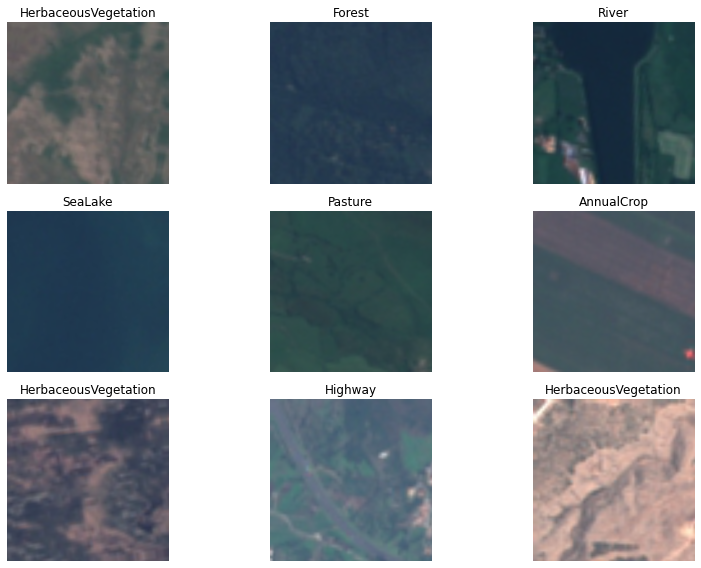

In [ ]:
data.show_batch(rows=3, figsize=(12,8))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-04
Min loss divided by 10: 6.92E-03


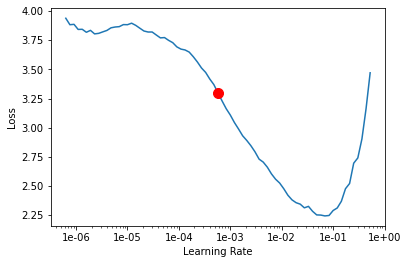

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
lr = 5.75E-04
learn.fit_one_cycle(6, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.536101,0.237874,0.078333,2:39:33


KeyboardInterrupt: ignored

In [ ]:
# save the model
learn.save('resnet50_mod_01')

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-6, lr/10))

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()